In [1]:
import HelmetRegionChecker
import tensorflow as tf
import numpy as np

from keras.models import load_model
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
import copy
import matplotlib.patches as patches

c:\Users\th070\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pytorch 1.13.1+cpu
torchvision 0.14.1+cpu


In [3]:
Image1 = r'E:\GithubProjects\KagglePractice\HelmetDetection\TestImage\1.jpg'
Image2 = r'E:\GithubProjects\KagglePractice\HelmetDetection\TestImage\2.jpg'
ModelPos = r'E:\GithubProjects\KagglePractice\HelmetDetection\models\HelmetDetectionModel2.h5'

In [4]:
model = load_model(ModelPos)

In [8]:
def GetPredictedData(HeadImage):
	# plt.imshow(cv.resize(HeadImages[0][0], (100, 100)))
	TargetImage = np.zeros((100, 100,3))
	ConvertedImage = copy.deepcopy(HeadImage)
	Height, Width = ConvertedImage.shape[:2]

	x0,y0,x1,y1 = 0, 0, 0, 0
	for x in range(Width):
		if np.any(ConvertedImage[:,x] != np.array([0, 0, 0])):
			x0=x
			break
	for x in range(Width-1, -1 , -1):
		if np.any(ConvertedImage[:,x] != np.array([0, 0, 0])):
			x1=x
			break
	for y in range(Height):
		if np.any(ConvertedImage[y,:] != np.array([0, 0, 0])):
			y0=y
			break
	for y in range(Height-1, -1 , -1):
		if np.any(ConvertedImage[y,:] != np.array([0, 0, 0])):
			y1=y
			break

	ConvertedImage = ConvertedImage[y0:y1,x0:x1]
	Height, Width = ConvertedImage.shape[:2]
	if Width > Height:
		# Width : Height = 100 : ?
		ConvertedImage = cv.resize(ConvertedImage, (100, int(100 * Height / Width)))
	else:
		ConvertedImage = cv.resize(ConvertedImage, (int(100 * Width / Height), 100))
	Height, Width = ConvertedImage.shape[:2]

	if Width > Height:
		x0,y0 = 0, 50 - int(Height/2)
		x1,y1 = Width, y0 + Height
	else:
		x0,y0 = 50 - int(Width / 2), 0
		x1,y1 = x0 + Width, Height

	TargetImage[y0:y1,x0:x1] = ConvertedImage[:,:]
	TargetImage = TargetImage.astype('int16')
	return model.predict(np.array([TargetImage]))

def ShowPredictImage(ImagePos):
	HeadImages = HelmetRegionChecker.GetHelmetImages(ImagePos,IsClear=True)

	fig, ax = plt.subplots(1, figsize=(16, 16))
	Img = Image.open(ImagePos)
	Img = Img.resize((480, 360))
	plt.imshow(Img)
	for i, Data in enumerate(HeadImages):
		Percent = GetPredictedData(Data[0])
		print(Percent)
		LeftTop, RightBottom = (int(Data[3][0]),int(Data[3][1])), (int(Data[3][2]),int(Data[3][3]))
		
		Color = "lightgreen" if float(Percent[0][0]) < 0.5 else "red"
		
		
		rect = patches.Rectangle(LeftTop, RightBottom[0]-LeftTop[0], RightBottom[1]-LeftTop[1], linewidth=2, edgecolor=Color, facecolor='none')
		ax.add_patch(rect)

1/1 [==============================] - 0s 157ms/step
[[1.]]
1/1 [==============================] - 0s 29ms/step
[[1.]]
1/1 [==============================] - 0s 26ms/step
[[0.]]
1/1 [==============================] - 0s 32ms/step
[[1.]]


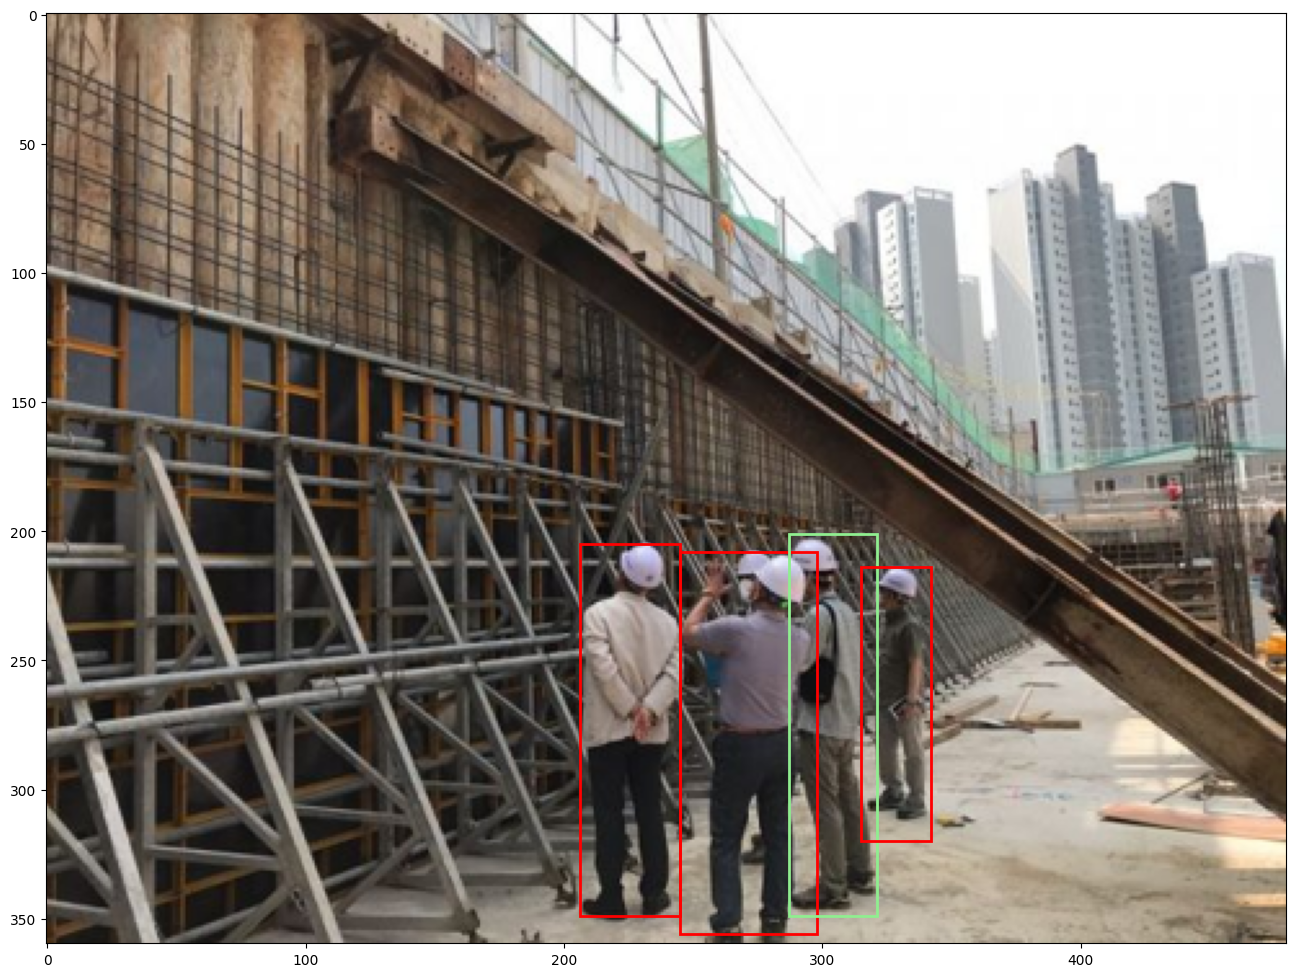

In [9]:
ShowPredictImage(Image1)

c:\Users\th070\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\th070\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\th070\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to pa

1/1 [==============================] - 0s 36ms/step
[[1.]]
1/1 [==============================] - 0s 28ms/step
[[1.]]
1/1 [==============================] - 0s 31ms/step
[[1.]]


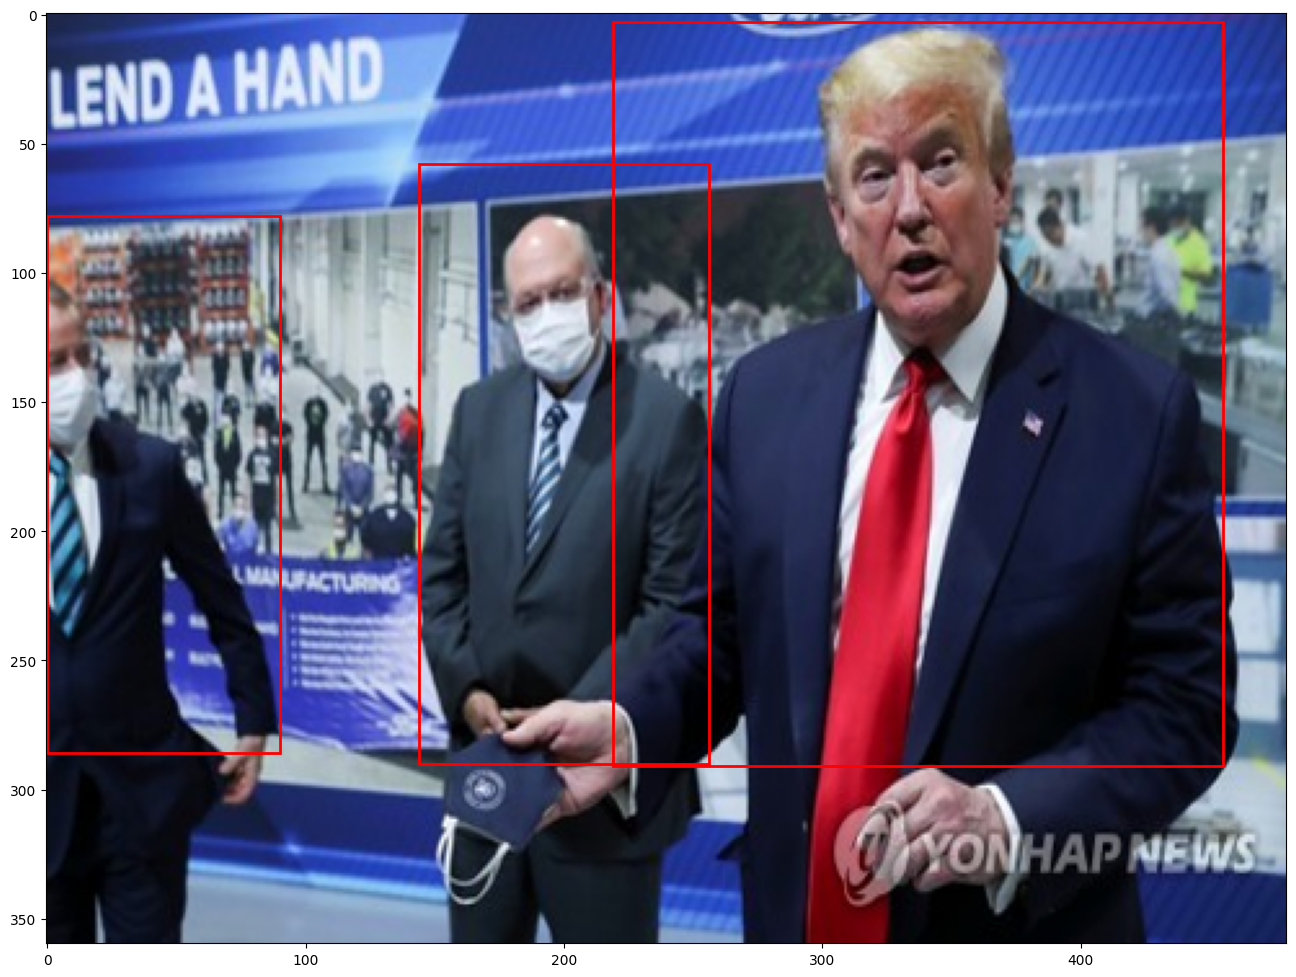

In [10]:
ShowPredictImage(Image2)

ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ 데이터 셋 문제인 듯